<a href="https://colab.research.google.com/github/Abhyuday767/Research_project_Feb2024/blob/main/Recurrence_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-learn

In [80]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder    #for converting to numerical data
from sklearn.decomposition import PCA             #for dimensionality reduction
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [29]:
from google.colab import files
upload = files.upload()   #upload the file "Patient and Treatment Characteristics - Marked by Dr Anjali.xlsx" from your local storage

Saving Patient and Treatment Characteristics.xls to Patient and Treatment Characteristics (1).xls


In [47]:
file_path = "Patient and Treatment Characteristics.xls"
df = pd.read_excel(file_path)

In [48]:
df

,TCIA code,Sex,Age,Date of Birth,Diag,Site,Histology,Grade,T,N,...,Pre-RT Imaging Date,Pre-RT Imaging Modality,CT sim date,post-RT imaging date,post-RT imaging modality,Recurrence imaging date,Recurrence imaging modality,Additional imaging date,Additional imaging modality,Additional imaging notes
0,HNSCC-01-0001,Female,54,NaN,CA soft palate,Oropharynx,SCC,moderately to poorly diff.,2,2c,...,1998-12-01,PET/CT,1998-12-05,1999-03-27,PET/CT,NaT,NaN,NaN,NaN,NaN
1,HNSCC-01-0002,Female,56,NaN,NPC,Nasopharynx,SCC,moderately diff.,4,2,...,2001-10-01,PET/CT,2001-11-20,2003-12-03,PET/CT,2004-10-19,MRI Orbits,NaN,NaN,NaN
2,HNSCC-01-0003,Male,48,NaN,CA tonsil,Oropharynx,SCC,moderately diff.,2,2b,...,2001-10-30,PET/CT,2001-11-20,2002-06-09,PET/CT,NaT,NaN,NaN,NaN,NaN
3,HNSCC-01-0004,Male,65,NaN,CA tonsil,Oropharynx,SCC,poorly diff.,4a,2c,...,1996-08-28,PET/CT,1996-08-24,1997-05-11,PET/CT,NaT,NaN,NaN,NaN,NaN
4,HNSCC-01-0005,Male,66,NaN,CA tonsil,Oropharynx,SCC,moderately diff.,2,1,...,NaT,NaN,1998-01-19,2000-03-27,PET/CT,2000-03-27,PET/CT,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,HNSCC-01-0211,Male,66,NaN,CA supraglottic,Glottis,SCC,moderately diff.,4a,2b,...,2003-04-08,PET/CT,2003-06-17,2003-12-02,PET/CT,NaT,NaN,NaN,NaN,NaN
211,HNSCC-01-0212,Female,58,NaN,CA supraglottic,Glottis,SCC,moderately diff.,4a,0,...,2003-10-22,PET/CT,NaT,2004-10-12,PET/CT,NaT,NaN,NaN,NaN,NaN
212,HNSCC-01-0213,Male,59,NaN,CA larynx,Glottis,SCC,well diff.,3,2b,...,2004-05-18,PET/CT,2004-05-18,2005-08-27,PET/CT,2005-04-05,CT head & neck,NaN,NaN,NaN
213,HNSCC-01-0214,Male,50,NaN,CA supraglottic,Glottis,SCC,moderately diff.,3,2b,...,2004-04-22,"CT Chest, Abd, Pelvis",2004-07-27,2005-02-07,PET/CT,NaT,NaN,NaN,NaN,NaN


In [49]:
df.isnull().mean()  #notice how DOB has mean =1 which means it has all none values

TCIA code                      0.000000
Sex                            0.000000
Age                            0.000000
Date of Birth                  1.000000
Diag                           0.000000
                                 ...   
Recurrence imaging date        0.813953
Recurrence imaging modality    0.813953
Additional imaging date        0.981395
Additional imaging modality    0.981395
Additional imaging notes       0.981395
Length: 83, dtype: float64

In [50]:
columns_before_drop = df.columns


threshold = 0.8  #setting threshold as if 80% are missing values then drop column
columns_to_drop = df.columns[df.isnull().mean()>threshold]
df = df.drop(columns=columns_to_drop)


columns_after_drop = df.columns

dropped_columns = set(columns_before_drop)-set(columns_after_drop)     #DOB, Date Feeding tube placed, Date Feeding tube removed and Recurrence imaging date removed from the list of columns (as discussed with professor)
print("Dropped columns :")
for column in dropped_columns:
  print(column)

Dropped columns :
Feeding tube note
Date of Birth
Date Feeding tube placed
Additional imaging date
Recurrence imaging modality
Date Feeding tube removed
Additional imaging modality
Additional imaging notes
Recurrence imaging date


In [51]:
for column in df.columns:
    if df[column].dtype == 'int64' or df[column].dtype == 'float64':
      df[column] = df[column].fillna(df[column].mean())         #fill the missing values of numerical data type with MEAN
    elif df[column].dtype == 'object':
      df[column] = df[column].fillna(df[column].mode()[0])      #fill the missing values of categorical data type with MODE

In [52]:
df.columns[df.isnull().any()]        #as we can see, null values in only datetime[ns] data type are left, we will tackle them by analysing them manually

Index(['Date of Death', 'Date of recurrence', 'Pre-RT Imaging Date',
       'CT sim date'],
      dtype='object')

In [53]:
df['Date of Death'].isnull().sum()

127

In [54]:
df['Date of recurrence'].isnull().sum()

3

In [55]:
df['Pre-RT Imaging Date'].isnull().sum()

2

In [56]:
df['CT sim date'].isnull().sum()

13

In [57]:
df.drop('Date of Death', axis=1)   #as the no. of null values is 127 and we also have column survival(months)
for column in df.columns[df.isnull().any()]:          #replacing the other values with their respective MEAN
  mean_datetime = df[column].mean()
  df[column] = df[column].fillna(mean_datetime)

Converting to numerical form now..

In [65]:
df.select_dtypes(include=['int']).columns

Index(['TCIA code', 'Sex', 'Age', 'Diag', 'Site', 'Histology', 'Grade', 'M',
       'Follow up duration (day)', 'Overall Survival Censor',
       'Disease Specific Survival Censor', 'Loco-regional Control Censor',
       'Number of Fractions', 'Smoking History', 'Current Smoker',
       'Total RT treatment time (days)'],
      dtype='object')

In [66]:
df.select_dtypes(include=['object']).columns

Index(['T', 'N', 'Stage', 'HPV status', 'Alive or Dead', 'Cause of Death',
       'Site of recurrence (Distal/Local/ Locoregional)',
       'Oncologic Treatment Summary', 'Induction Chemotherapy',
       'Chemotherapy Regimen', 'Platinum-based chemotherapy',
       'Received Concurrent Chemoradiotherapy?', 'CCRT Chemotherapy Regimen',
       'Surgery Summary', 'Dose/Fraction (Gy/fx)',
       'Unplanned Additional Oncologic Treatment',
       'Received Feeding Tube (Y/N)', 'Type of feeding tube',
       'PreRT Skeletal Muscle status', 'PostRT Skeletal Muscle status',
       'Pre-RT Imaging Modality', 'post-RT imaging modality'],
      dtype='object')

In [67]:
df.select_dtypes(include=['datetime']).columns

Index(['Date of Diagnosis', 'Last Contact Date', 'Date of Death',
       'Date of recurrence', 'Date Start RT', 'Date Stop RT',
       'Pre-RT Imaging Date', 'CT sim date', 'post-RT imaging date'],
      dtype='object')

In [68]:
label_encoder = LabelEncoder()

# Iterate through each column in the DataFrame
for col in df.columns:
    # Check if the column is categorical
    if df[col].dtype == 'object':
        # Fit label encoder and transform values
        df[col] = label_encoder.fit_transform(df[col].astype(str))
    elif df[col].dtype == 'datetime64[ns]':
        # Convert datetime columns to Unix timestamp
        df[col] = pd.to_datetime(df[col]).astype(int) / 10**9

In [69]:
df

,TCIA code,Sex,Age,Diag,Site,Histology,Grade,T,N,M,...,Post-RT CT-derived lean body mass (kg),Pre-RT CT-derived fat body mass (kg),Post-RT CT-derived fat body mass (kg),PreRT Skeletal Muscle status,PostRT Skeletal Muscle status,Pre-RT Imaging Date,Pre-RT Imaging Modality,CT sim date,post-RT imaging date,post-RT imaging modality
0,0,0,54,13,5,0,2,2,5,0,...,25.867339,16.386422,14.151560,0,0,9.124704e+08,1,9.128160e+08,9.224928e+08,1
1,1,0,56,17,3,0,1,5,2,0,...,36.280183,21.974862,20.115046,0,0,1.001894e+09,1,1.006214e+09,1.070410e+09,1
2,2,1,48,15,5,0,1,2,4,0,...,36.280183,21.974862,20.115046,0,0,1.004400e+09,1,1.006214e+09,1.023581e+09,1
3,3,1,65,15,5,0,3,6,5,0,...,62.824526,21.680734,17.225138,1,1,8.411904e+08,1,8.408448e+08,8.633088e+08,1
4,4,1,66,15,5,0,1,2,1,0,...,46.298532,34.644220,26.205688,1,0,9.580527e+08,1,8.851680e+08,9.541152e+08,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,210,1,66,14,1,0,1,6,4,0,...,70.075291,13.982018,14.801468,1,1,1.049760e+09,1,1.055808e+09,1.070323e+09,1
211,211,0,58,14,1,0,1,6,0,0,...,40.677737,38.271376,29.830275,1,0,1.066781e+09,1,9.606795e+08,1.097539e+09,1
212,212,1,59,5,1,0,5,3,4,0,...,53.821468,30.797431,23.585505,1,1,1.084838e+09,1,1.084838e+09,1.125101e+09,1
213,213,1,50,14,1,0,1,3,4,0,...,59.356636,18.504404,15.478349,0,1,1.082592e+09,0,1.090886e+09,1.107734e+09,1


In [71]:
#saving the converted numerical dataframe in an excel file as requested by the professor
df.to_excel("numerical_converted.xlsx", index=False)

print(f"DataFrame has been successfully exported")

DataFrame has been successfully exported


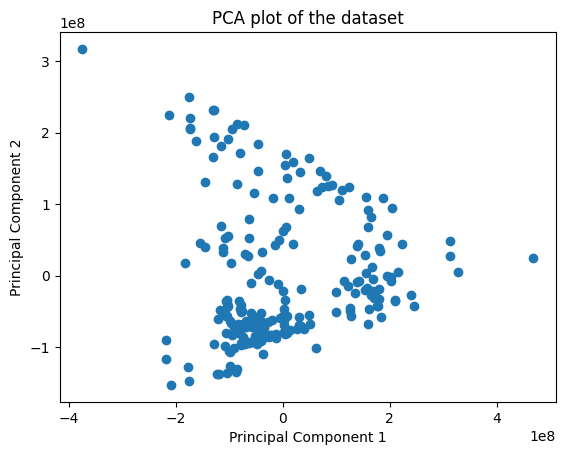

In [74]:
# Instantiate PCA with 2 for visualization
pca = PCA(n_components=2)

# Fit PCA to your data
pca.fit(df)

# Transform the data using the fitted PCA
df_pca = pca.transform(df)

# Visualize the data in reduced dimensions (for 2D)
plt.scatter(df_pca[:, 0], df_pca[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA plot of the dataset')
plt.show()

In [89]:
print("present" if "Survival  (months)"in df.columns else "not present")

present


In [90]:
# Separate features and target variable
X = df.drop(columns=['Survival  (months)'])  # Features
y = df['Survival  (months)']  # Target variable

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)  # Adjust the number of components as needed
X_pca = pca.fit_transform(X_scaled)

# Create a new DataFrame with reduced dimensions
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

# Concatenate the target variable with the reduced DataFrame if needed
df_pca['Survival  (months)'] = y

# Now df_pca contains your dataset with reduced dimensions
df_pca

,PC1,PC2,Survival (months)
0,0.166176,8.555287,99.600000
1,5.161454,2.457185,42.016438
2,1.164624,3.423631,61.133333
3,0.980876,-1.497944,13.433333
4,-3.495779,0.434988,110.266667
...,...,...,...
210,4.141073,-2.115936,43.133333
211,4.156984,-2.564192,20.166667
212,2.846304,-4.834512,28.100000
213,7.165554,-4.596290,20.566667


In [91]:
df_pca

,PC1,PC2,Survival (months)
0,0.166176,8.555287,99.600000
1,5.161454,2.457185,42.016438
2,1.164624,3.423631,61.133333
3,0.980876,-1.497944,13.433333
4,-3.495779,0.434988,110.266667
...,...,...,...
210,4.141073,-2.115936,43.133333
211,4.156984,-2.564192,20.166667
212,2.846304,-4.834512,28.100000
213,7.165554,-4.596290,20.566667


**Could be used for dimensionality reduction for all the 4 goals mentioned in the readme documnet**


# Goal 1: Survival Prediction
# Features: age, diagnosis, grade, stage
# Target variable: Survival (possible or not)

# Prepare data for survival prediction
X_survival = df[['Age', 'Diag', 'Grade', 'Stage']]
y_survival = df['Alive or Dead']  # Assuming 'Alive or Dead' is the target variable

# Split the dataset into training and testing sets
X_train_survival, X_test_survival, y_train_survival, y_test_survival = train_test_split(X_survival, y_survival, test_size=0.2, random_state=42)

# Standardize the features
scaler_survival = StandardScaler()
X_train_survival_scaled = scaler_survival.fit_transform(X_train_survival)
X_test_survival_scaled = scaler_survival.transform(X_test_survival)

# Apply dimensionality reduction using PCA
pca_survival = PCA(n_components=0.95)
X_train_survival_pca = pca_survival.fit_transform(X_train_survival_scaled)
X_test_survival_pca = pca_survival.transform(X_test_survival_scaled)

# Train a classifier (e.g., Random Forest) for survival prediction
clf_survival = RandomForestClassifier(random_state=42)
clf_survival.fit(X_train_survival_pca, y_train_survival)

# Evaluate the classifier
y_pred_survival = clf_survival.predict(X_test_survival_pca)
accuracy_survival = accuracy_score(y_test_survival, y_pred_survival)
print("Accuracy for survival prediction:", accuracy_survival)

# Goal 2: Recurrence Analysis
# Features: age, stage
# Target variable: Recurrence (binary)

# Prepare data for recurrence analysis
X_recurrence = df[['Age', 'Stage']]
y_recurrence = df['Site of recurrence (Distal/Local/ Locoregional)']  # Assuming this represents recurrence

# Perform similar steps as above for preprocessing and modeling

# Goal 3: Chemotherapy Requirement
# Features: stage, sex, diagnosis
# Target variable: Chemotherapy requirement (binary)

# Prepare data for chemotherapy requirement analysis
X_chemo = df[['Stage', 'Sex', 'Diag']]
y_chemo = df['Chemotherapy Regimen']  # Assuming this represents chemotherapy requirement

# Perform similar steps as above for preprocessing and modeling

# Goal 4: Prescribed Dose Analysis
# Features: age, RT Total Dose (Gy), Dose/Fraction (Gy/fx)
# Target variable: None (unsupervised analysis)

# Prepare data for prescribed dose analysis
X_dose = df[['Age', 'RT Total Dose (Gy)', 'Dose/Fraction (Gy/fx)']]

# Perform unsupervised analysis (e.g., clustering) or other exploratory analysis on X_dose


Accuracy for survival prediction: 0.6511627906976745
